<h1 style="text-align: center;">[Your Project Title]</h1>
<h3 style="text-align: center;">[Your Name]</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

**1.2 Problem Statements**

**1.3 Goals**

**1.4 Analytical Approach**

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

**1.6 Success Criteria**

## **Section 2. Data Understanding**

In [16]:
# Library

import pandas as pd
import numpy as np
import missingno

**2.1 General Information**

| Attribute                | Data Type       | Description                                                           |
|--------------------------|-----------------|-----------------------------------------------------------------------|
| Agency                   | Object            | Name of the insurance agency issuing the policy                                   |
| Agency Type              | Object            | Category or type of travel insurance agency       |
| Distribution Channel     | Object            | Method of selling insurance products |
| Product Name             | Object            |  Official name of a specific travel insurance product                       |
| Gender                   | Object            | Gender of the insured person (M, F)                                   |
| Duration                 | Integer         | Duration of travel in days                                            |
| Destination              | Object            | Travel destination of the insured person                              |
| Net Sales                | Float           | Amount of sales generated by the travel insurance policy              |
| Commision (in value)     | Float           | Commission earned by the agency for the insurance policy              |
| Age                      | Integer         | Age of the insured person                                             |
| Claim                    | Object            | Claim status (Yes, No) indicating whether a claim was made against the policy |

**2.2 Feature Information**

| Feature | Impact to Business |
|---------| ------------------ |
|Agency | Helps understand sales patterns and contributions from each agency |
| Agency Type  | Determines which agency type is more effective in selling insurance products |
| Distribution Channel | Measures the effectiveness of each distribution channel in attracting customers |
| Product Name | Evaluates underperforming products for innovation or feature improvements | 
| Gender | Analyzes differences in behavior based on gender |
| Duration | Helps set accurate pricing for premiums based on duration risk |
| Destination | Helps segment the market based on popular destinations and Determines premium pricing strategies based on destination risks |
| Net Sales | Forms the basis for strategies to boost sales and increase company revenue | 
| Commission (in value) | Forms a basis for designing balanced incentive schemes for agencies |
| Age | Helps segment the market to design products and premium pricing tailored to age demographics.Helps segment the market to design products and premium pricing tailored to age demographics | 


**2.3 Statistics Summary**

In [17]:
df = pd.read_csv(r'D:\Purwadhika\Module 3. Machine Learning\Capstone\travel_insurance\data\raw\data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [19]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [20]:
df.describe(include='object')

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [21]:
# Check missing values
print("Total rows that have missing values: ", df.isnull().sum().sum())

Total rows that have missing values:  31647


In [22]:
df.isna().sum()/len(df.index)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

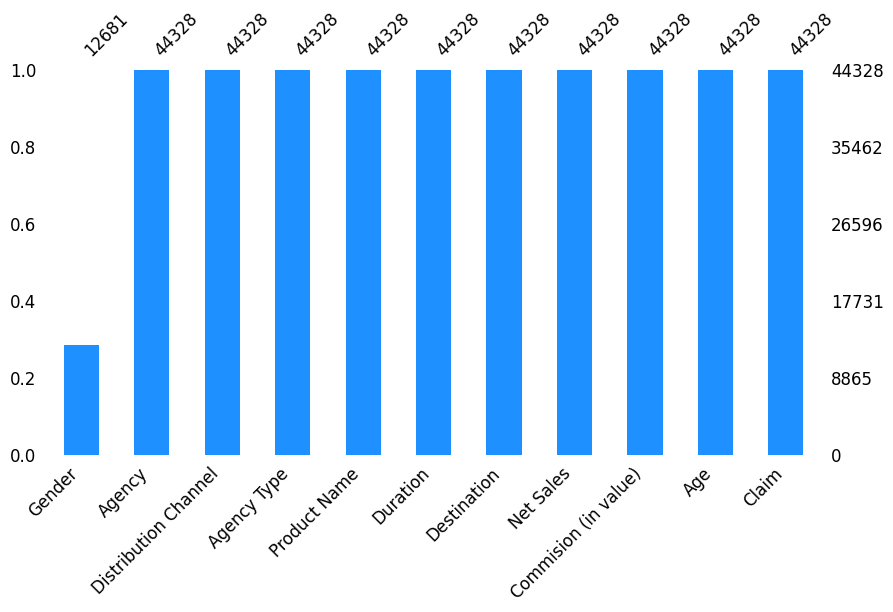

In [23]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

<Axes: >

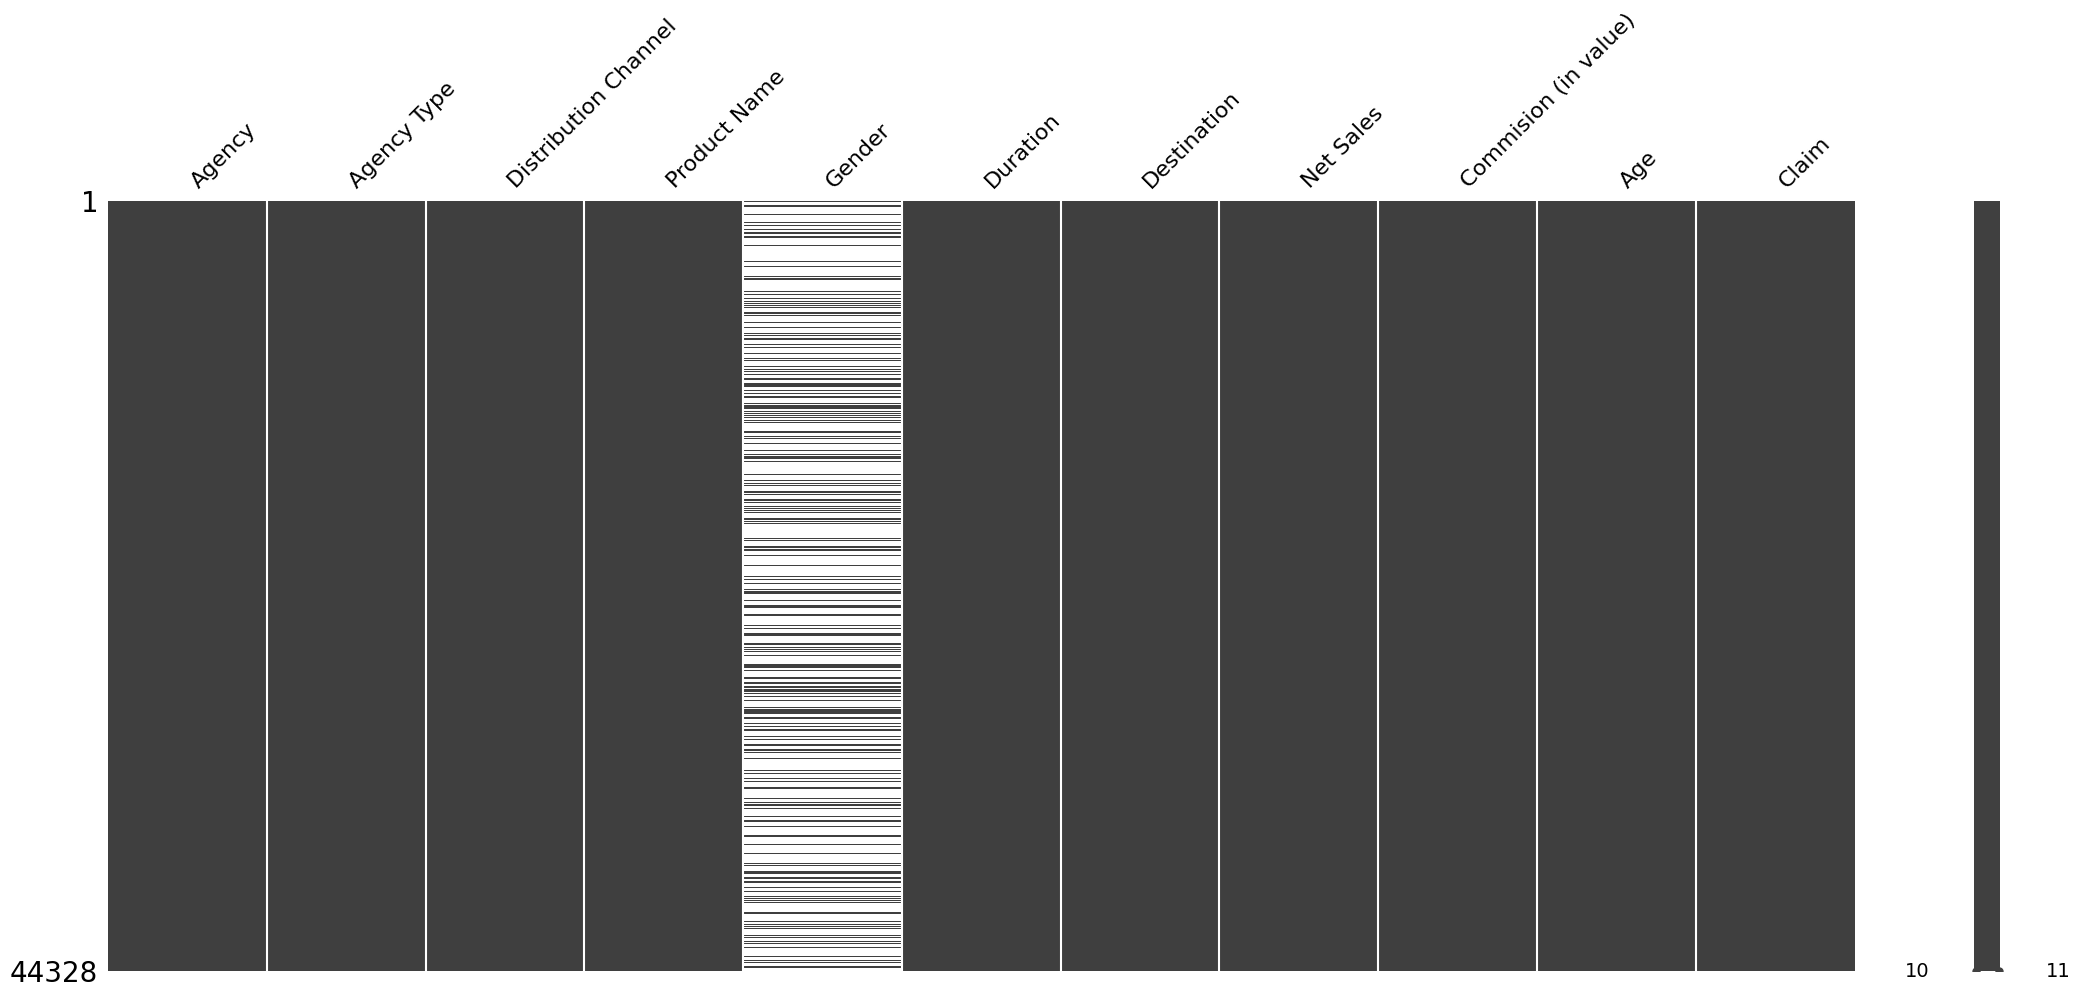

In [24]:
missingno.matrix(df)

In [25]:
clean_df = df.drop(['Gender'], axis=1)
clean_df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**3.2 Duplicated Values**

In [26]:
# Duplicated rows
print("Total duplicated rows: ", clean_df.duplicated().sum())

Total duplicated rows:  5004


In [27]:
cleaned_df = clean_df.drop_duplicates(keep='first').reset_index(drop=True)
cleaned_df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**3.3 Identify Spelling Errors**

In [28]:
# Data Cleaning - Categoric Variable

categoric_features = df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total category on '{col}': {df[col].nunique()}")

Total category on 'Agency': 16
Total category on 'Agency Type': 2
Total category on 'Distribution Channel': 2
Total category on 'Product Name': 26
Total category on 'Gender': 2
Total category on 'Destination': 138
Total category on 'Claim': 2


In [29]:
for col in categoric_features.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()

Column: Agency
Agency
EPX    24656
CWT     5980
C2B     5753
JZI     4433
SSI      765
JWT      522
RAB      513
LWC      455
TST      354
KML      281
ART      229
CCR      126
CBH       69
TTW       69
CSR       68
ADM       55
Name: count, dtype: int64

Column: Agency Type
Agency Type
Travel Agency    32113
Airlines         12215
Name: count, dtype: int64

Column: Distribution Channel
Distribution Channel
Online     43572
Offline      756
Name: count, dtype: int64

Column: Product Name
Product Name
Cancellation Plan                       12979
2 way Comprehensive Plan                 9341
Rental Vehicle Excess Insurance          5980
Basic Plan                               3834
Bronze Plan                              2847
1 way Comprehensive Plan                 2336
Value Plan                               1907
Silver Plan                              1552
Annual Silver Plan                        975
Ticket Protector                          765
Travel Cruise Protect            

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)


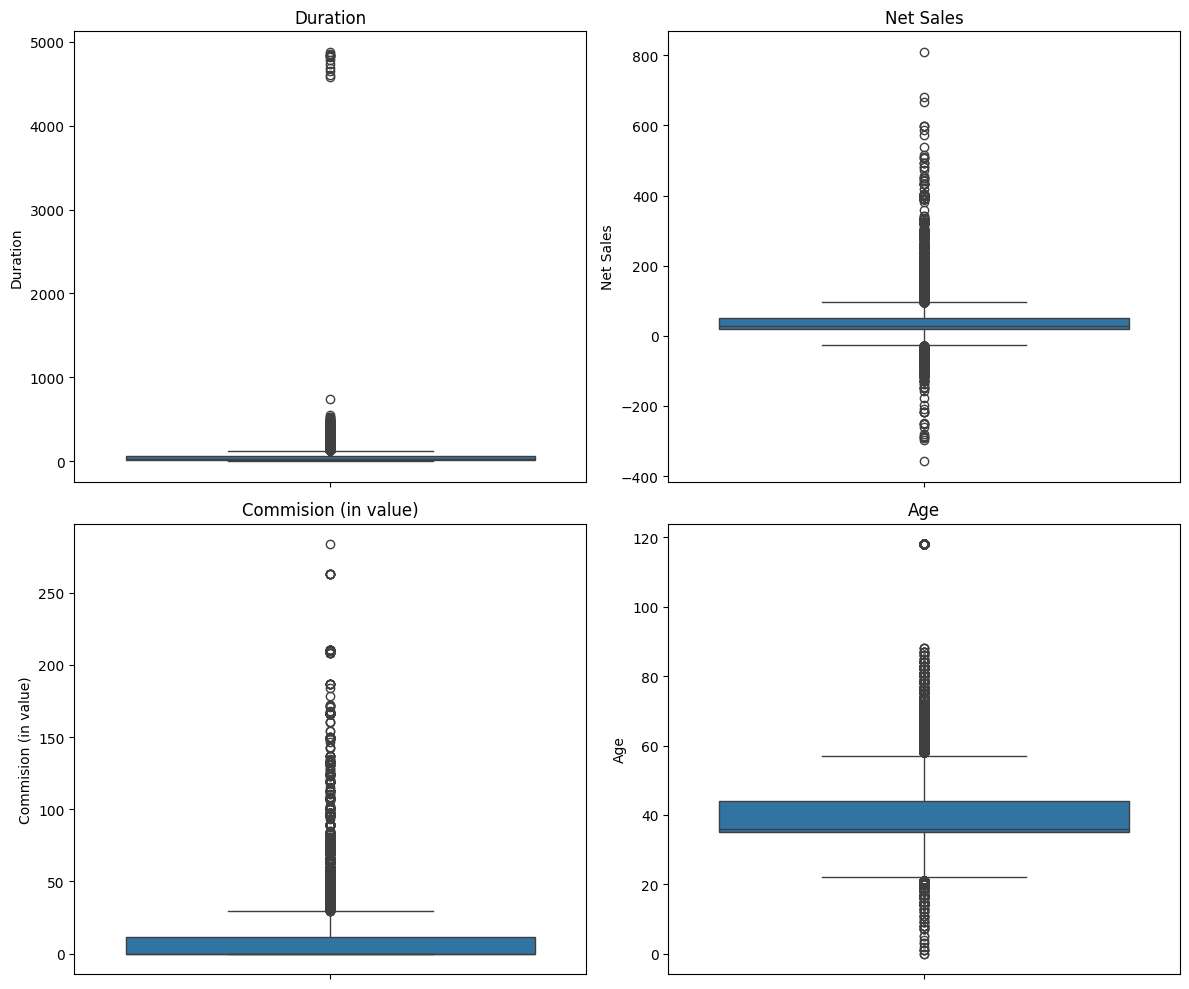

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numeric features
numeric_features = cleaned_df.drop('Claim', axis=1).select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
for idx, feature in enumerate(numeric_features, start=1):
    sns.boxplot(cleaned_df[feature], ax=plt.subplot(2, 2, idx))
    plt.subplot(2, 2, idx).set_title(feature)
plt.tight_layout()
plt.show()

In [53]:
filtered_df = cleaned_df[(cleaned_df['Duration'] <= 4000) & (cleaned_df['Age'] <= 100)]

In [54]:
print(f"Jumlah data sebelum filter: {len(cleaned_df)}")
print(f"Jumlah data setelah filter: {len(filtered_df)}")

Jumlah data sebelum filter: 39324
Jumlah data setelah filter: 38888


- Check Cardinality (Categorical Variable)

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Analysis 1**

**5.2 Analysis 2**

## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function
- Define Feature and Target

**6.2 Data Transformation (Feature Engineering)**

**6.3 Overview**

## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

**7.2 Developing the Model Pipeline**

**7.3 Model Benchmarking (Comparing model base performance)**

**7.4 Tune Model**

**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

**7.6 Model Calibration (Classification Only)**

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)